# Project description

This notebook represents data analytics on the topic of research dedicated to the spread of emerging contaminants -- pharmaceuticals and products of personal care products (PPCP). Influence of PPCP is mostly studied with the focus on the aquatic environment, however it is also worth to know the current state of the research dedicated to the less studied soil environment. To achieve this, analysis of titles and abstracts of peer-reviwed research papers published from 2000 to 2022 is performed.

This notebook consists of:
* data acquisition 
* data preparation
* data comparison
* and data visualisation steps.

Each step is supplied with comments, so it would be easy to understand the analysis workflow and reproduce it.
To perform analysis data from Dimensions scientific database https://www.dimensions.ai and Umwelt Bundesamt (UBA) Pharmaceuticals in the environment https://www.umweltbundesamt.de/en/database-pharmaceuticals-in-the-environment-0 were used.

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import regex as re
import numpy as np
import os
import glob
from pprint import pprint

## Creating peer-reviewed papers work dataset 

In [2]:
try:
  import google.colab
  !git clone https://github.com/po1line/Analytics-on-research-of-pharmaceuticals-entry-in-soils
  %cd Analytics-on-research-of-pharmaceuticals-entry-in-soils
except Exception:
  pass

In [3]:
!ls data/dimensions/


papers_2007-2000.xlsx papers_2017-2016.xlsx papers_2020.xlsx
papers_2012-2008.xlsx papers_2018.xlsx      papers_2021.xlsx
papers_2015-2013.xlsx papers_2019.xlsx      papers_2022.xlsx


In [4]:
#folder
path = "data/dimensions/"
#global search in set folder of xlsx files
filenames = glob.glob(path + "*.xlsx")
#looking at the files
pprint(filenames)

['data/dimensions/papers_2012-2008.xlsx',
 'data/dimensions/papers_2021.xlsx',
 'data/dimensions/papers_2020.xlsx',
 'data/dimensions/papers_2015-2013.xlsx',
 'data/dimensions/papers_2017-2016.xlsx',
 'data/dimensions/papers_2007-2000.xlsx',
 'data/dimensions/papers_2019.xlsx',
 'data/dimensions/papers_2022.xlsx',
 'data/dimensions/papers_2018.xlsx']


In [5]:
#collecting files in merged dataframe
df = pd.DataFrame() #starting with empty dataframe
for file_name in filenames:
    data = pd.read_excel(file_name, 
                         skiprows=[0])
    df = pd.concat((df,data)).reset_index(drop=True)
#appending each read table in the empty dataframe
#important! do not forget to drop index at appending stage to avoid multiple index search results


In [6]:
#look at the data
display(df.head(3))
print(df.info())

,Rank,Publication ID,DOI,PMID,PMCID,Title,Abstract,Acknowledgements,Source title,Anthology title,...,Corresponding Authors,Authors Affiliations,Times cited,Recent citations,RCR,FCR,Source Linkout,Dimensions URL,FOR (ANZSRC) Categories,Sustainable Development Goals
0,3405,pub.1034753825,10.1002/etc.487,21312249.0,NaN,Influence of sewage and pharmaceuticals on soi...,Although sewage effluent application to land i...,We thank Catriona MacDonald and ESR for advice...,Environmental Toxicology and Chemistry,NaN,...,NaN,"Gielen, Gerty J. H. P. (Scion); Clinton, Peter...",14,3,0.43,1.47,NaN,https://app.dimensions.ai/details/publication/...,0605 Microbiology; 0503 Soil Sciences; 05 Envi...,NaN
1,3376,pub.1069010127,10.2134/jeq2009.0090,20830908.0,NaN,Selected Veterinary Pharmaceuticals in Agricul...,Veterinary pharmaceuticals are commonly admini...,This study was supported in part by Agricultur...,Journal of Environmental Quality,NaN,...,"Li, Hui (Michigan State University)","Song, Wenlu (Michigan State University); Ding,...",48,3,1.74,4.91,NaN,https://app.dimensions.ai/details/publication/...,0503 Soil Sciences; 05 Environmental Sciences,NaN
2,3320,pub.1026757075,10.1007/s00244-010-9500-y,20340015.0,NaN,Dissipation and Leaching Potential of Selected...,Biosolids land application is an important pat...,This research was funded by the USDA-CSREES pr...,Archives of Environmental Contamination and To...,NaN,...,"Wu, Chenxi (University of Toledo)","Wu, Chenxi (University of Toledo); Spongberg, ...",38,4,1.20,3.97,NaN,https://app.dimensions.ai/details/publication/...,0503 Soil Sciences; 05 Environmental Sciences,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           2983 non-null   int64  
 1   Publication ID                 2983 non-null   object 
 2   DOI                            2950 non-null   object 
 3   PMID                           1432 non-null   float64
 4   PMCID                          317 non-null    object 
 5   Title                          2983 non-null   object 
 6   Abstract                       2948 non-null   object 
 7   Acknowledgements               1518 non-null   object 
 8   Source title                   2684 non-null   object 
 9   Anthology title                471 non-null    object 
 10  MeSH terms                     1224 non-null   object 
 11  Publication Date               2983 non-null   object 
 12  PubYear                        2983 non-null   i

In [7]:
# removing duplicated entries with the same DOIs  
df.drop_duplicates(subset = ['DOI'], inplace=True, ignore_index=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           2951 non-null   int64  
 1   Publication ID                 2951 non-null   object 
 2   DOI                            2950 non-null   object 
 3   PMID                           1400 non-null   float64
 4   PMCID                          312 non-null    object 
 5   Title                          2951 non-null   object 
 6   Abstract                       2918 non-null   object 
 7   Acknowledgements               1515 non-null   object 
 8   Source title                   2652 non-null   object 
 9   Anthology title                471 non-null    object 
 10  MeSH terms                     1195 non-null   object 
 11  Publication Date               2951 non-null   object 
 12  PubYear                        2951 non-null   i

### First look at the publication statistics

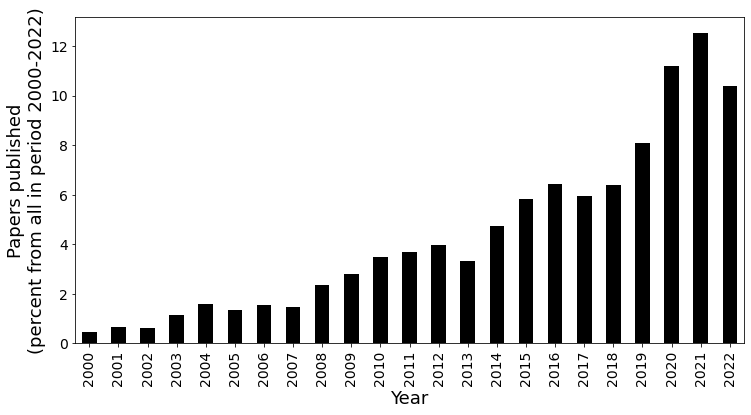

In [8]:
#prepare data from doi counts by years and visualise it
published_papers = df.groupby('PubYear')[['DOI']].count().reset_index()
published_papers['perc']=100*published_papers['DOI']/published_papers['DOI'].sum()

ax = published_papers.plot(x='PubYear', y='perc', kind='bar', 
                                                figsize=(12, 6),
                                                color = 'black', 
                                                fontsize = 14,
                                                legend=False)
plt.xlabel('Year', fontsize=18)
plt.ylabel(r'Papers published'
           '\n'
           r'(percent from all in period 2000-2022)', fontsize=18)

output_name = 'result_plots/published_papers.png'
plt.savefig(output_name, dpi=300, bbox_inches='tight')

In [9]:
#absolute values
#df.groupby('PubYear')[['PubYear']].count().plot(kind='bar', 
#                                                figsize=(12, 6),
#                                                color = 'black', 
#                                                fontsize = 14,
#                                                legend=False)

#plt.xlabel('Year', fontsize=18)
#plt.ylabel('Papers published', fontsize=18)
#plt.savefig('published_papers.png', dpi=300, bbox_inches='tight')

### Data cleaning 
In data cleaning step we 
* remove coding characters and punctiation symbols
* set lowercases for the text of abstract

In [10]:
#example of such characters 
df.Abstract[860]

'Application of municipal biosolids in agriculture present a concern with potential uptake and bioaccumulation of pharmaceutical compounds from biosolids into agronomic plants. We evaluated the efficacy of biochar as a soil amendment to minimize uptake of antimicrobial agents (ciprofloxacin, triclocarban, and triclosan) in lettuce (Lactuca sativa) and carrot (Daucus carota) plants. Biochar reduced the concentration of ciprofloxacin and triclocarban in lettuce leaves and resulted in a 67% reduction of triclosan in carrot roots. There was no substantial difference in pharmaceutical concentrations in carrot and lettuce plant matter at low (2.0\u2009g kg-1 soil) and high (20.4\u2009g kg-1 soil) rates of applied biochar. The co-amendment of biochar and biosolids increased soil pH and nutrient content which were positively correlated with an increase in lettuce shoot biomass. Our results demonstrate the potential efficacy of using walnut shell biochar as a sorbent for pharmaceutical contamin

In [11]:
#apply encode-decode to the all items in column
df.Abstract=df.Abstract.str.encode('utf-8').str.decode('ascii', 'ignore')

#lowering letters, removing syntax and other non-letter characters 
df.Abstract = df.Abstract.str.replace('[^a-zA-Z]', ' ', regex=True)
df.Abstract = df.Abstract.replace(r'\s+', ' ', regex=True)


#lower case
df['Abstract'] = df['Abstract'].str.lower()

#check
df.Abstract[860]

'application of municipal biosolids in agriculture present a concern with potential uptake and bioaccumulation of pharmaceutical compounds from biosolids into agronomic plants we evaluated the efficacy of biochar as a soil amendment to minimize uptake of antimicrobial agents ciprofloxacin triclocarban and triclosan in lettuce lactuca sativa and carrot daucus carota plants biochar reduced the concentration of ciprofloxacin and triclocarban in lettuce leaves and resulted in a reduction of triclosan in carrot roots there was no substantial difference in pharmaceutical concentrations in carrot and lettuce plant matter at low g kg soil and high g kg soil rates of applied biochar the co amendment of biochar and biosolids increased soil ph and nutrient content which were positively correlated with an increase in lettuce shoot biomass our results demonstrate the potential efficacy of using walnut shell biochar as a sorbent for pharmaceutical contaminants in soil without negatively affecting pl

## Reading the data from database of Umwelt Bundesamt and comparing dimensions df data with it
Database "Pharmaceuticals in the environment" (Excel file)
<br> Sheet 1 -- concentrations found in environment with citation source from international and local litarature
<br> Sheet 2 -- general information, including therapeutic groups descriptions
https://www.umweltbundesamt.de/dokument/database-pharmaceuticals-in-the-environment-excel

In this section we perform next steps:
* we exctract name of analytes by which we perform search through the abstracts
* we exctract corresponding therapeutic group and target group names and combine them with name of analytes into the dictionaries with keys

In [12]:
FOLDER = './data/'
path2 = os.path.join(FOLDER, 'pharms-uba_v3_2021_0.xlsx')
source_base = pd.read_excel(path2, sheet_name = 'Pharma_Agents_v3')
source_base.head(3)

,Name of Analyte,Analyte Name German,CAS number,Therapeutic Group English,Therapeutic Group German,Target Group,Type of Analyte,Pharma Parent Transformation,PharmaATC1,PharmaATC2,PharmaATC3,PharmaATC4,PharmaATC5,PharmaATC6,PharmaATC7,PharmaATC8,PharmaATC9,PharmaATC10,PharmaATC11
0,1-(3-Chlorophenyl)-piperazine,1-(3-Chlorophenyl)-piperazin,6640-24-0,Antidepressant,Antidepressiva,Human,Transformation product,Trazodone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1,2-Dihydro budesonide","1,2-Dihydro budesonide",137174-25-5,Glucocorticoids,Glucocorticode,Human,Transformation product,Budesonide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,2-Dihydro clobetasol propionate","1,2-Dihydro clobetasol propionate",25120-99-4,Glucocorticoids,Glucocorticode,Human,Transformation product,Clobetasol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#extracting of unique names of pharm analytes from UBA database
source_list = source_base['Name of Analyte'].str.lower().unique().tolist()
#looking at the list
source_list[:10]

['1-(3-chlorophenyl)-piperazine',
 '1,2-dihydro budesonide',
 '1,2-dihydro clobetasol propionate',
 '1,2-dihydro fluocinolone acetonide',
 '1,5-dimethyl-1,2-dehydro-3-pyrazolone',
 '10,11-dihydro-10,11-dihydroxy carbamazepine',
 '10,11-dihydro-10,11-epoxycarbamazepine',
 '10,11-dihydro-10-hydroxycarbamazepine',
 '10,11-dihydrocarbamazepine',
 '10-hydroxy-amitriptyline']

In [14]:
#creating keys dictionaries
source_base = source_base.apply(lambda x: x.astype(str).str.lower())

#rename few columns for convenience
source_base.rename(columns = {'Name of Analyte':'name_of_analyte', 
                              'Therapeutic Group English':'therapeutic_group_english',
                              'Target Group': 'target_group'}, inplace = True)

#setting a dictionary with pair key:value == name of analyte:therapeutic group
therapeutic_group_keys = dict (zip(source_base['name_of_analyte'], source_base['therapeutic_group_english']))
therapeutic_group_keys.update({'acetaminophen':'analgesics',
                              'paracetamol':'analgesics',
                              'aspirin':'nonsteroidal anti-inflammatory drugs',
                              'acetylsalicylic acid':'nonsteroidal anti-inflammatory drugs', 
                              'clofibric acid': 'lipid-lowering drugs',
                              'salicylic acid': 'skin care',
                              'gemfibrocil':'lipid-lowering drugs', 
                              'flufenamic acid': 'nonsteroidal anti-inflammatory drugs',
                              'caffeine':'other'
                              })

#setting a dictionary with pair key:value == name of analyte:target group
target_group_keys = dict (zip(source_base['name_of_analyte'], source_base['target_group']))
target_group_keys.update({'acetaminophen':'human',
                          'paracetamol':'human',
                          'aspirin':'human and veterinary',
                          'acetylsalicylic acid':'human and veterinary',
                          'clofibric acid': 'human',
                          'salicylic acid': 'human',
                          'gemfibrocil':'human',
                          'flufenamic acid': 'human',
                          'caffeine':'human'})

## List of mentioned pharmaceuticals in the abstract (unique)

We then use the ``source list`` to search unique mentions of analytes in the abstract texts to extract occurring words and estimate their occurrence level. The search is based on the unique mention of analyte in the abstracts, new column ``pharmaceuticals`` in ``df`` contains lists of unique words, even if they can be mentioned multiple times in the corresponding abstract.

In [15]:
#additional words and phrases for search
add_words_list = ['acetaminophen',
                 'paracetamol',
                 'aspirin',
                 'acetylsalicylic acid',
                 'clofibric acid',
                 'salicylic acid',
                 'gemfibrocil',
                 'flufenamic acid',
                 'caffeine']

source_list = source_list+add_words_list


df['pharmaceuticals'] = 'NaN' #new column

#filling new column with unique words mathching with source list from UBA
for i in range(len(df)):
    # select i row in df
    select = df.iloc[i,:]
    # select only Abstract from row
    abstract = select['Abstract']
    # sometimes abstract it's NaN, in such case return NaN 
    if type(abstract) != str:
        df.at[i, "pharmaceuticals"] = 'NaN'
    else:
        # empty set to collect unique names of pharmaceuticals
        list_of_target_words = set() #for unique values
        for item in source_list:
            # if pharmaceutical not find in source_list - > continue to next 
            if abstract.find(item)==-1:
                continue
            else:
                list_of_target_words.add(item)
        #for unique sorted names
        df.at[i, "pharmaceuticals"] = list(sorted(list_of_target_words)) 

In [16]:
#look at the result -- new column in the df dataset 
df.pharmaceuticals.head(10)


0    [acetaminophen, aspirin, carbamazepine, chlorp...
1             [amprolium, carbadox, monensin, tylosin]
2    [carbamazepine, clindamycin, diltiazem, diphen...
3    [carbamazepine, fluoxetine, naproxen, sulfamet...
4                                                   []
5                            [caffeine, carbamazepine]
6    [ciprofloxacin, clofibric acid, diclofenac, ib...
7    [acetaminophen, carbamazepine, codeine, ibupro...
8    [bezafibrate, clarithromycin, clindamycin, dic...
9                                                   []
Name: pharmaceuticals, dtype: object

In [17]:
#skipped step: manual catching of the missed PPCP names on a random sample of length 20
#random_sample = df_analysis.iloc[:,[6,32]].sample(20).reset_index(drop=True)

#for i, row in random_sample.iterrows():
#    print(row['pharmaceuticals'])
#    print(row['Abstract'])
#    print() 

In [18]:
#check how many entries of new column "pharmaceuticals" are not 0 and not NaNs
print(round(100*(len(df[df["pharmaceuticals"].str.len(
) != 0])+len(df.query("pharmaceuticals == 'NaN'")))/len(df),1), '% of initial entries of new column are not 0 and non-NaN')

30.8 % of initial entries of new column are not 0 and non-NaN


## Final dataframe for the analysis

For the further work we will use new dataframe ``df_analysis``

In [19]:
#removing NaN and zero data 
df = df.query("pharmaceuticals != 'NaN'")

df_analysis = df[df["pharmaceuticals"].str.len() != 0]
len(df_analysis)

843

In [20]:
#lowercase for main columns 
df_analysis = df_analysis.apply(lambda x: x.astype(str).str.lower(
) if x.name != 'pharmaceuticals' and x.name != 'Times cited' and x.name != 'PubYear' else x )

display(df_analysis.head(3))
#print(df_analysis.info())

,Rank,Publication ID,DOI,PMID,PMCID,Title,Abstract,Acknowledgements,Source title,Anthology title,...,Authors Affiliations,Times cited,Recent citations,RCR,FCR,Source Linkout,Dimensions URL,FOR (ANZSRC) Categories,Sustainable Development Goals,pharmaceuticals
0,3405,pub.1034753825,10.1002/etc.487,21312249.0,nan,influence of sewage and pharmaceuticals on soi...,although sewage effluent application to land i...,we thank catriona macdonald and esr for advice...,environmental toxicology and chemistry,nan,...,"gielen, gerty j. h. p. (scion); clinton, peter...",14,3,0.43,1.47,nan,https://app.dimensions.ai/details/publication/...,0605 microbiology; 0503 soil sciences; 05 envi...,nan,"[acetaminophen, aspirin, carbamazepine, chlorp..."
1,3376,pub.1069010127,10.2134/jeq2009.0090,20830908.0,nan,selected veterinary pharmaceuticals in agricul...,veterinary pharmaceuticals are commonly admini...,this study was supported in part by agricultur...,journal of environmental quality,nan,...,"song, wenlu (michigan state university); ding,...",48,3,1.74,4.91,nan,https://app.dimensions.ai/details/publication/...,0503 soil sciences; 05 environmental sciences,nan,"[amprolium, carbadox, monensin, tylosin]"
2,3320,pub.1026757075,10.1007/s00244-010-9500-y,20340015.0,nan,dissipation and leaching potential of selected...,biosolids land application is an important pat...,this research was funded by the usda-csrees pr...,archives of environmental contamination and to...,nan,...,"wu, chenxi (university of toledo); spongberg, ...",38,4,1.2,3.97,nan,https://app.dimensions.ai/details/publication/...,0503 soil sciences; 05 environmental sciences,nan,"[carbamazepine, clindamycin, diltiazem, diphen..."


### Manual excluding of the irrelevant environmental matrix (not soils)

In [21]:
#check the list of publications on the scope: is the paper really not about the groundwater,
#and about soils themselves
#df_analysis[df_analysis.Title.str.contains("groundwater")].to_csv('groundwater_papers.csv')

In [22]:
FOLDER = './data/'
path_3 = os.path.join(FOLDER, 'groundwater_papers_manually_checked.csv')
doi_to_remove = pd.read_csv(path_3)
doi_to_remove.head(3)

,DOI,Check
0,10.1016/j.chemosphere.2011.12.018,ok
1,10.2166/wst.2012.290,ok
2,10.1016/j.scitotenv.2012.06.031,exclude


In [23]:
#excluding of irrelevant publications
doi_exclude = doi_to_remove.query("Check == 'exclude'")['DOI'].to_list()
df_analysis = df_analysis.query("DOI != @doi_exclude")
#number of final entries
len(df_analysis)

828

In [24]:
df_analysis = df_analysis.reset_index(drop = True)
df_analysis.head(10)

,Rank,Publication ID,DOI,PMID,PMCID,Title,Abstract,Acknowledgements,Source title,Anthology title,...,Authors Affiliations,Times cited,Recent citations,RCR,FCR,Source Linkout,Dimensions URL,FOR (ANZSRC) Categories,Sustainable Development Goals,pharmaceuticals
0,3405,pub.1034753825,10.1002/etc.487,21312249.0,nan,influence of sewage and pharmaceuticals on soi...,although sewage effluent application to land i...,we thank catriona macdonald and esr for advice...,environmental toxicology and chemistry,nan,...,"gielen, gerty j. h. p. (scion); clinton, peter...",14,3,0.43,1.47,nan,https://app.dimensions.ai/details/publication/...,0605 microbiology; 0503 soil sciences; 05 envi...,nan,"[acetaminophen, aspirin, carbamazepine, chlorp..."
1,3376,pub.1069010127,10.2134/jeq2009.0090,20830908.0,nan,selected veterinary pharmaceuticals in agricul...,veterinary pharmaceuticals are commonly admini...,this study was supported in part by agricultur...,journal of environmental quality,nan,...,"song, wenlu (michigan state university); ding,...",48,3,1.74,4.91,nan,https://app.dimensions.ai/details/publication/...,0503 soil sciences; 05 environmental sciences,nan,"[amprolium, carbadox, monensin, tylosin]"
2,3320,pub.1026757075,10.1007/s00244-010-9500-y,20340015.0,nan,dissipation and leaching potential of selected...,biosolids land application is an important pat...,this research was funded by the usda-csrees pr...,archives of environmental contamination and to...,nan,...,"wu, chenxi (university of toledo); spongberg, ...",38,4,1.2,3.97,nan,https://app.dimensions.ai/details/publication/...,0503 soil sciences; 05 environmental sciences,nan,"[carbamazepine, clindamycin, diltiazem, diphen..."
3,3304,pub.1015133810,10.1897/08-657.1,19580336.0,nan,factors affecting the degradation of pharmaceu...,pharmaceuticals may be released to the soil en...,the development of this paper was funded by th...,environmental toxicology and chemistry,nan,...,"monteiro, sara c. (university of york; fera sc...",133,14,4.51,13.63,https://setac.onlinelibrary.wiley.com/doi/pdfd...,https://app.dimensions.ai/details/publication/...,0503 soil sciences; 05 environmental sciences;...,nan,"[carbamazepine, fluoxetine, naproxen, sulfamet..."
4,3174,pub.1036761509,10.1016/j.chemosphere.2008.09.048,18996568.0,nan,factors impacting on pharmaceutical leaching f...,sewage effluent application to land is a treat...,we thank the new zealand foundation for resear...,chemosphere,nan,...,"gielen, gerty j.h.p. (scion); van den heuvel, ...",44,5,1.0,3.97,nan,https://app.dimensions.ai/details/publication/...,0503 soil sciences; 05 environmental sciences,nan,"[caffeine, carbamazepine]"
5,3129,pub.1041971931,10.1007/s00216-011-4826-5,21416164.0,nan,assessment of the occurrence and distribution ...,the distribution of pharmaceuticals between wa...,this work has been supported by the spanish mi...,analytical and bioanalytical chemistry,nan,...,"vazquez-roig, pablo (university of valencia); ...",74,9,3.08,8.9,nan,https://app.dimensions.ai/details/publication/...,03 chemical sciences; 0301 analytical chemistry,nan,"[ciprofloxacin, clofibric acid, diclofenac, ib..."
6,3107,pub.1005223864,10.1016/j.scitotenv.2012.08.036,23021792.0,nan,risk assessment on the presence of pharmaceuti...,this study is focused on the occurrence of pha...,this work has been supported by the spanish mi...,the science of the total environment,nan,...,"vazquez-roig, pablo (university of valencia); ...",142,30,5.78,16.17,nan,https://app.dimensions.ai/details/publication/...,09 engineering; 0503 soil sciences; 03 chemica...,nan,"[acetaminophen, carbamazepine, codeine, ibupro..."
7,3097,pub.1069010134,10.2134/jeq2009.0105,20830907.0,nan,transport of pharmaceuticals in columns of a w...,the irrigation or agricultural land with waste...,"j. siemens, g. huschek, and g. walshe conducte...",journal of environmental quality,nan,...,"siemens, jan (university of bonn); huschek, ge...",28,4,0.92,2.92,nan,https://app.dimensions.ai/details/publicat

In [25]:
#skipped step: manual catching of the missed PPCP names on a random sample of length 20
#random_sample = df_analysis.iloc[:,[6,32]].sample(20).reset_index(drop=True)

#for i, row in random_sample.iterrows():
#    print(row['pharmaceuticals'])
#    print(row['Abstract'])
#    print()

## Analysis list

In [26]:
#setting of a list of pharmaceuticals names occurred in the abstracts
analysis_list = []
for items in df_analysis['pharmaceuticals'].tolist():
    for item in items:
        analysis_list.append(item)
print(sorted(analysis_list[0:10]))
print(len(analysis_list))

['acetaminophen', 'amprolium', 'aspirin', 'carbadox', 'carbamazepine', 'chlorpromazine', 'monensin', 'salicylic acid', 'tetracycline', 'tylosin']
2732


## Occurrence analysis

In [27]:
#creating of a new dataframe containing the info with mentions of pharmaceuticals in abstracts 
#and corresponding therapeutic group
occurrence_data = pd.DataFrame(analysis_list, columns =['pharmaceutical_name'])
occurrence_data['theraupeutic_group'] = occurrence_data['pharmaceutical_name'].map(therapeutic_group_keys)
occurrence_data['target_group'] = occurrence_data['pharmaceutical_name'].map(target_group_keys)
# replace of lost item
occurrence_data['pharmaceutical_name'].replace('acetaminophen','paracetamol', regex=True, inplace=True)
occurrence_data['pharmaceutical_name'].replace('acetylsalicylic acid','aspirin', regex=True, inplace=True)

#checking new data
occurrence_data.head(5)

,pharmaceutical_name,theraupeutic_group,target_group
0,paracetamol,analgesics,human
1,aspirin,nonsteroidal anti-inflammatory drugs,human and veterinary
2,carbamazepine,antiepileptic drugs,human
3,chlorpromazine,dopamine agonist,human
4,salicylic acid,skin care,human


In [28]:
#check unique names of analytes
len(occurrence_data.pharmaceutical_name.unique())

337

### Most frequently studied substances (mentions more than 10)

In [29]:
#setting the citation threshold
threshold = 10

In [30]:
#grouping of the analysis data by substances and according to the threshold
frequently_studied_pharmaceuticals = occurrence_data['pharmaceutical_name'].value_counts(
)[occurrence_data['pharmaceutical_name'].value_counts(
)>threshold].rename_axis('pharmaceutical_name').reset_index(name='counts')#.hist()

#seting important variables from created dictionaries
frequently_studied_pharmaceuticals['therapeutic_group'] = frequently_studied_pharmaceuticals['pharmaceutical_name'].map(therapeutic_group_keys)
frequently_studied_pharmaceuticals['environment'] = 'soil'
frequently_studied_pharmaceuticals['target_group'] = frequently_studied_pharmaceuticals['pharmaceutical_name'].map(target_group_keys)

#setting mentions percentage from all number of mentions in subsample
frequently_studied_pharmaceuticals['perc']=100*frequently_studied_pharmaceuticals['counts']/frequently_studied_pharmaceuticals['counts'].sum()
#rounding percentage variable
frequently_studied_pharmaceuticals['perc'] = frequently_studied_pharmaceuticals['perc'].round(decimals=1)

display(frequently_studied_pharmaceuticals.head(3))
print(len(frequently_studied_pharmaceuticals))

,pharmaceutical_name,counts,therapeutic_group,environment,target_group,perc
0,carbamazepine,207,antiepileptic drugs,soil,human,10.3
1,ibuprofen,143,analgesics,soil,human,7.1
2,diclofenac,130,analgesics,soil,human,6.5


51


In [31]:
#save results
#output_name = 'result_tables/frequently_studied_pharmaceuticals.csv'
#reference_df.to_csv(output_name) 

In [32]:
#grouping of the analysis data by the therapeutic group
frequently_studied_theur_grops = occurrence_data['theraupeutic_group'].value_counts(
)[occurrence_data['theraupeutic_group'].value_counts(
)>threshold].rename_axis('theraupeutic_group').reset_index(name='counts')
frequently_studied_theur_grops['environment'] = 'soil'

#setting mentions percentage from all number of mentions in subsample
frequently_studied_theur_grops['perc'] = 100*frequently_studied_theur_grops['counts']/frequently_studied_theur_grops['counts'].sum()
#rounding percentage variable 
frequently_studied_theur_grops['perc'] = frequently_studied_theur_grops['perc'].round(decimals=1)

frequently_studied_theur_grops.head(3)

,theraupeutic_group,counts,environment,perc
0,antibiotics,928,soil,36.2
1,analgesics,490,soil,19.1
2,antiepileptic drugs,214,soil,8.3


In [33]:
#save results
#output_name = 'result_tables/frequently_studied_theur_grops.csv'
#reference_df.to_csv(output_name) 

## Results visualisation

### Whole timeline (from 2000 to 2022)

#### Therapeutical groups pie plotly vis

In [34]:
#library for dynamic visualisations (jupyter notebook/lab, Google Colab)
import plotly.express as px
import importlib

In [35]:
#defining coloring settings: pallette (pal) and number of colors (n)
n = len(frequently_studied_theur_grops)
pal = list(sns.color_palette(palette="light:#5A9", n_colors=n).as_hex())

In [ ]:
#visualisation
fig = px.pie(frequently_studied_theur_grops, 
             values='perc', 
             names='theraupeutic_group',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', 
                  textinfo='percent+label', 
                  hole=.6, 
                  hoverinfo="label+percent+name", 
                  textfont_size=14)

fig.update_layout(width = 1600, height = 900,
                  margin = dict(t=0, l=0, r=600, b=0),
                  legend_font_size = 14)

#output_name = 'result_plots/pie_plot.png'
#fig.write_image(output_name, scale=6)
fig.show()

#### Analyte names as parallel categories vis

In [ ]:
fig = px.parallel_categories(frequently_studied_pharmaceuticals.sort_values(by=['counts',
                                                                                'pharmaceutical_name'], 
                                                                            ascending=False), 
                             dimensions=['pharmaceutical_name','target_group','therapeutic_group'], 
                             color='counts', 
                             labels = {'pharmaceutical_name':'',
                                       'target_group':'',
                                       'therapeutic_group':''},
                            height=900,
                            width=1400)

fig.update_traces(tickfont={'size': 12})
# move colorbar
fig.update_layout(coloraxis_colorbar=dict(orientation="h"),
                  coloraxis_colorbar_thickness=10,
                  legend_font_size = 14)

# output_name = 'result_plots/pharmaceuticals_pc_whole_timeline.png'
# fig.write_image(output_name, scale=4)
fig.show()

#### Analyte names as parallel categories vis -- limited occurrence (mentions perc >1)

In [ ]:
fig = px.parallel_categories(frequently_studied_pharmaceuticals.query('perc>1').sort_values(by=['counts',
                                                                                'pharmaceutical_name'], 
                                                                            ascending=False), 
                             dimensions=['pharmaceutical_name','target_group','therapeutic_group'], 
                             color='counts', 
                             labels = {'pharmaceutical_name':'',
                                       'target_group':'',
                                       'therapeutic_group':''},
                            height=600,
                            width=1200)

fig.update_traces(tickfont={'size': 12})
# move colorbar
fig.update_layout(coloraxis_colorbar=dict(orientation="h"),
                  coloraxis_colorbar_thickness=10)

#output_name = 'result_plots/pharmaceuticals_pc_whole_timeline_1_perc.png'
#fig.write_image(output_name, scale=4)

fig.show()

## Last 5 years

In [ ]:
analysis_list_recent = []
for items in df_analysis.query('PubYear >= 2017')['pharmaceuticals'].tolist():
    for item in items:
        analysis_list_recent.append(item)
#creating of a new dataframe containing the info with mentions of pharmaceuticals in abstracts 
#and corresponding therapeutic group
occurrence_data_recent = pd.DataFrame(analysis_list_recent, columns =['pharmaceutical_name'])
occurrence_data_recent['theraupeutic_group'] = occurrence_data_recent['pharmaceutical_name'].map(therapeutic_group_keys)
occurrence_data_recent['target_group'] = occurrence_data_recent['pharmaceutical_name'].map(target_group_keys)
# replace of lost item
occurrence_data_recent['pharmaceutical_name'].replace('acetaminophen','paracetamol', regex=True, inplace=True)
#checking new data
display(occurrence_data_recent.head(3))
#check unique names of analytes
print(len(occurrence_data_recent.pharmaceutical_name.unique()))

In [ ]:
#grouping of the analysis data by substances
frequently_studied_pharmaceuticals_r = occurrence_data_recent['pharmaceutical_name'].value_counts()[occurrence_data_recent['pharmaceutical_name'].value_counts(
)>threshold].rename_axis('pharmaceutical_name').reset_index(name='counts')#.hist()
#seting important variables
frequently_studied_pharmaceuticals_r['therapeutic_group'] = frequently_studied_pharmaceuticals_r['pharmaceutical_name'].map(therapeutic_group_keys)
frequently_studied_pharmaceuticals_r['environment'] = 'soil'
frequently_studied_pharmaceuticals_r['target_group'] = frequently_studied_pharmaceuticals_r['pharmaceutical_name'].map(target_group_keys)
print(len(frequently_studied_pharmaceuticals_r))


In [ ]:
fig = px.parallel_categories(frequently_studied_pharmaceuticals_r.sort_values(by=['counts',
                                                                                'pharmaceutical_name'], 
                                                                            ascending=False), 
                             dimensions=['pharmaceutical_name','target_group','therapeutic_group'], 
                             color='counts',
                             labels = {'pharmaceutical_name':'',
                                       'target_group':'',
                                       'therapeutic_group':''},
                            height=700,

                             width=1200).update_traces(labelfont={"size":18})

# move colorbar
fig.update_layout(coloraxis_colorbar=dict(orientation="h"),
                  coloraxis_colorbar_thickness=10)

#output_name = 'result_plots/pharmaceuticals_pc_from_2017.png'
#fig.write_image(output_name, scale=6)
fig.show()

In [ ]:
#grouping of the analysis data by the therapeutic group
frequently_studied_theur_grops_r = occurrence_data_recent['theraupeutic_group'].value_counts(
)[occurrence_data_recent['theraupeutic_group'].value_counts(
)>threshold].rename_axis('theraupeutic_group').reset_index(name='counts')
frequently_studied_theur_grops_r['perc'] = 100*frequently_studied_theur_grops_r['counts']/frequently_studied_theur_grops_r['counts'].sum()
#
frequently_studied_theur_grops_r['perc'] =frequently_studied_theur_grops_r['perc'].round(decimals=1)

In [ ]:
fig = px.pie(frequently_studied_theur_grops_r, 
             values='perc', 
             names='theraupeutic_group',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 1200, height = 850,
                  margin = dict(t=0, l=0, r=0, b=0))

#output_name = 'result_plots/pie_plot_from_2017.png'
#fig.write_image(output_name, scale=6)
fig.show()

## Before 2017

In [ ]:
df_before_2017 = df_analysis.query('PubYear < 2017')
analysis_list_before_2017 = []

for items in df_before_2017['pharmaceuticals'].tolist():
    for item in items:
        analysis_list_before_2017.append(item)

#creating of a new dataframe containing the info with mentions of pharmaceuticals in abstracts 
#and corresponding therapeutic group
occurrence_data_before_2017 = pd.DataFrame(analysis_list_before_2017, columns =['pharmaceutical_name'])
occurrence_data_before_2017['theraupeutic_group'] = occurrence_data_before_2017['pharmaceutical_name'].map(therapeutic_group_keys)
occurrence_data_before_2017['target_group'] = occurrence_data_before_2017['pharmaceutical_name'].map(target_group_keys)
# replace of lost item
occurrence_data_before_2017['pharmaceutical_name'].replace('acetaminophen','paracetamol', regex=True, inplace=True)
#checking new data
display(occurrence_data_before_2017.head(5))
#check unique names of analytes
print(len(occurrence_data_before_2017.pharmaceutical_name.unique()))

In [ ]:
#grouping of the analysis data by substances
frequently_studied_pharmaceuticals_b = occurrence_data_before_2017['pharmaceutical_name'].value_counts(
)[occurrence_data_before_2017['pharmaceutical_name'].value_counts()>threshold].rename_axis('pharmaceutical_name').reset_index(name='counts')#.hist()

#seting important variables
frequently_studied_pharmaceuticals_b['therapeutic_group'] = frequently_studied_pharmaceuticals_b['pharmaceutical_name'].map(therapeutic_group_keys)
frequently_studied_pharmaceuticals_b['environment'] = 'soil'
frequently_studied_pharmaceuticals_b['target_group'] = frequently_studied_pharmaceuticals_b['pharmaceutical_name'].map(target_group_keys)


In [ ]:
fig = px.parallel_categories(frequently_studied_pharmaceuticals_b.sort_values(by=['counts',
                                                                                'pharmaceutical_name'], 
                                                                            ascending=False), 
                             dimensions=['pharmaceutical_name','target_group','therapeutic_group'], 
                             color='counts',
                             labels = {'pharmaceutical_name':'',
                                       'target_group':'',
                                       'therapeutic_group':''},
                            height=700,
                            width=1200).update_traces(labelfont={"size":18})

# move colorbar
fig.update_layout(coloraxis_colorbar=dict(orientation="h"),
                  coloraxis_colorbar_thickness=10)

#output_name = 'result_plots/pharmaceuticals_pc_before_2017.png'
#fig.write_image(output_name, scale=6)


fig.show()

In [ ]:
#grouping of the analysis data by the therapeutic group
frequently_studied_pharmaceuticals_b = occurrence_data_before_2017['theraupeutic_group'].value_counts(
)[occurrence_data_before_2017['theraupeutic_group'].value_counts(
)>threshold].rename_axis('theraupeutic_group').reset_index(name='counts')

frequently_studied_pharmaceuticals_b['perc'] = 100*frequently_studied_pharmaceuticals_b['counts']/frequently_studied_pharmaceuticals_b['counts'].sum()
#
frequently_studied_pharmaceuticals_b['perc'] = frequently_studied_pharmaceuticals_b['perc'].round(decimals=1)

In [ ]:
fig = px.pie(frequently_studied_pharmaceuticals_b, 
             values='perc', 
             names='theraupeutic_group',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 1200, height = 850,
                  margin = dict(t=0, l=0, r=0, b=0))

#output_name = 'result_plots/pie_plot_before_2017.png'
#fig.write_image(output_name, scale=6)
fig.show()

## Top cited papers

On this stage we select the most cited papers by pharmaceuticals and among the last 5 years

In [ ]:
#top cited papers by mention of analytes
df_analysis = df_analysis.apply(lambda x: x.astype(str).str.lower(
) if x.name != 'Times cited' and x.name != 'PubYear' else x)
reference_df = pd.DataFrame()

for pharm in frequently_studied_pharmaceuticals.pharmaceutical_name:
    reference_data = df_analysis[df_analysis.pharmaceuticals.str.contains(pharm)][['DOI', 
                                                        'Title',
                                                        'Source title',
                                                        'PubYear',
                                                        'Times cited',
                                                        'pharmaceuticals']].query('PubYear >= 2017').sort_values(by='Times cited',
                                                                                  ascending=False).head(5)
    reference_data['pharmaceutical_name'] = pharm
    reference_df = pd.concat((reference_df,reference_data)).reset_index(drop=True)

In [ ]:
reference_df#.head(10)

#save results
output_name = 'result_tables/reference_df.csv'
reference_df.to_csv(output_name) 

In [ ]:
reference_df['reference_number'] = reference_df.groupby('Title', sort=False).ngroup()

In [ ]:
# display table with total amount of papers with mentions from 2000 to 2022
#pd.merge(reference_df, frequently_studied_pharmaceuticals[['pharmaceutical_name','counts']],on='pharmaceutical_name', how='left')

In [ ]:
#searching through each year top-5 cited publicaitons
#for year in df_analysis['PubYear'].unique():
#    display(df_analysis[df_analysis['PubYear'] == year][['DOI', 
#                                                        'Title',
#                                                        'Source title',
#                                                        'PubYear',
#                                                        'Times cited',
#                                                        'pharmaceuticals']].sort_values(by='Times cited', 
#                                                                    ascending=False).head(5))

# 🍂